#Red Juice dataset

Two datasets are included, related to red and white vinho verde juice samples, from the north of Portugal. the dataset is collected based on physicochemical tests.

###**source:**

Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at:

[@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
                
[Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)

[bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

For more information go to [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/186/wine+quality)

###**uasage:**
evaluate juice quality, research and education, etc.

###**atributes:**
**Fixed Acidity:** Represents the concentration of non-volatile acids in the wine.

**Volatile Acidity:** Indicates the amount of volatile acids (such as acetic acid) in the wine.

**Citric Acid:** Reflects the presence of citric acid, which contributes to freshness.

**Residual Sugar:** Measures the remaining sugar content after fermentation.

**Chlorides:** Quantifies the salt content in the wine.

**Free Sulfur Dioxide:** Represents the free form of sulfur dioxide, acting as an antioxidant and preservative.

**Total Sulfur Dioxide:** Combines free and bound sulfur dioxide levels.
Density: Indicates the density of the wine.

**pH:** Measures acidity or alkalinity.

**Sulphates:** Reflects the concentration of sulfur dioxide salts.

**Alcohol:** The alcohol content in the wine.

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv', delimiter=";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

###number of samples:

In [8]:
df.shape

(1599, 12)

In [6]:
df.size

19188

###statistical work

In [9]:
#summarize the data
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [13]:
#outlier percentage
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  outlier = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  percentage = np.shape(outlier)[0] * 100 / np.shape(df)[0]
  print("column %s outlier = %.2f%%" % (k, percentage))

column fixed acidity outlier = 3.06%
column volatile acidity outlier = 1.19%
column citric acid outlier = 0.06%
column residual sugar outlier = 9.69%
column chlorides outlier = 7.00%
column free sulfur dioxide outlier = 2.06%
column total sulfur dioxide outlier = 3.63%
column density outlier = 2.81%
column pH outlier = 2.19%
column sulphates outlier = 3.69%
column alcohol outlier = 0.88%
column quality outlier = 1.75%


In [18]:
df = df[~(df['quality'] >= 8)]
print(np.shape(df))

(1581, 12)


###data visualization

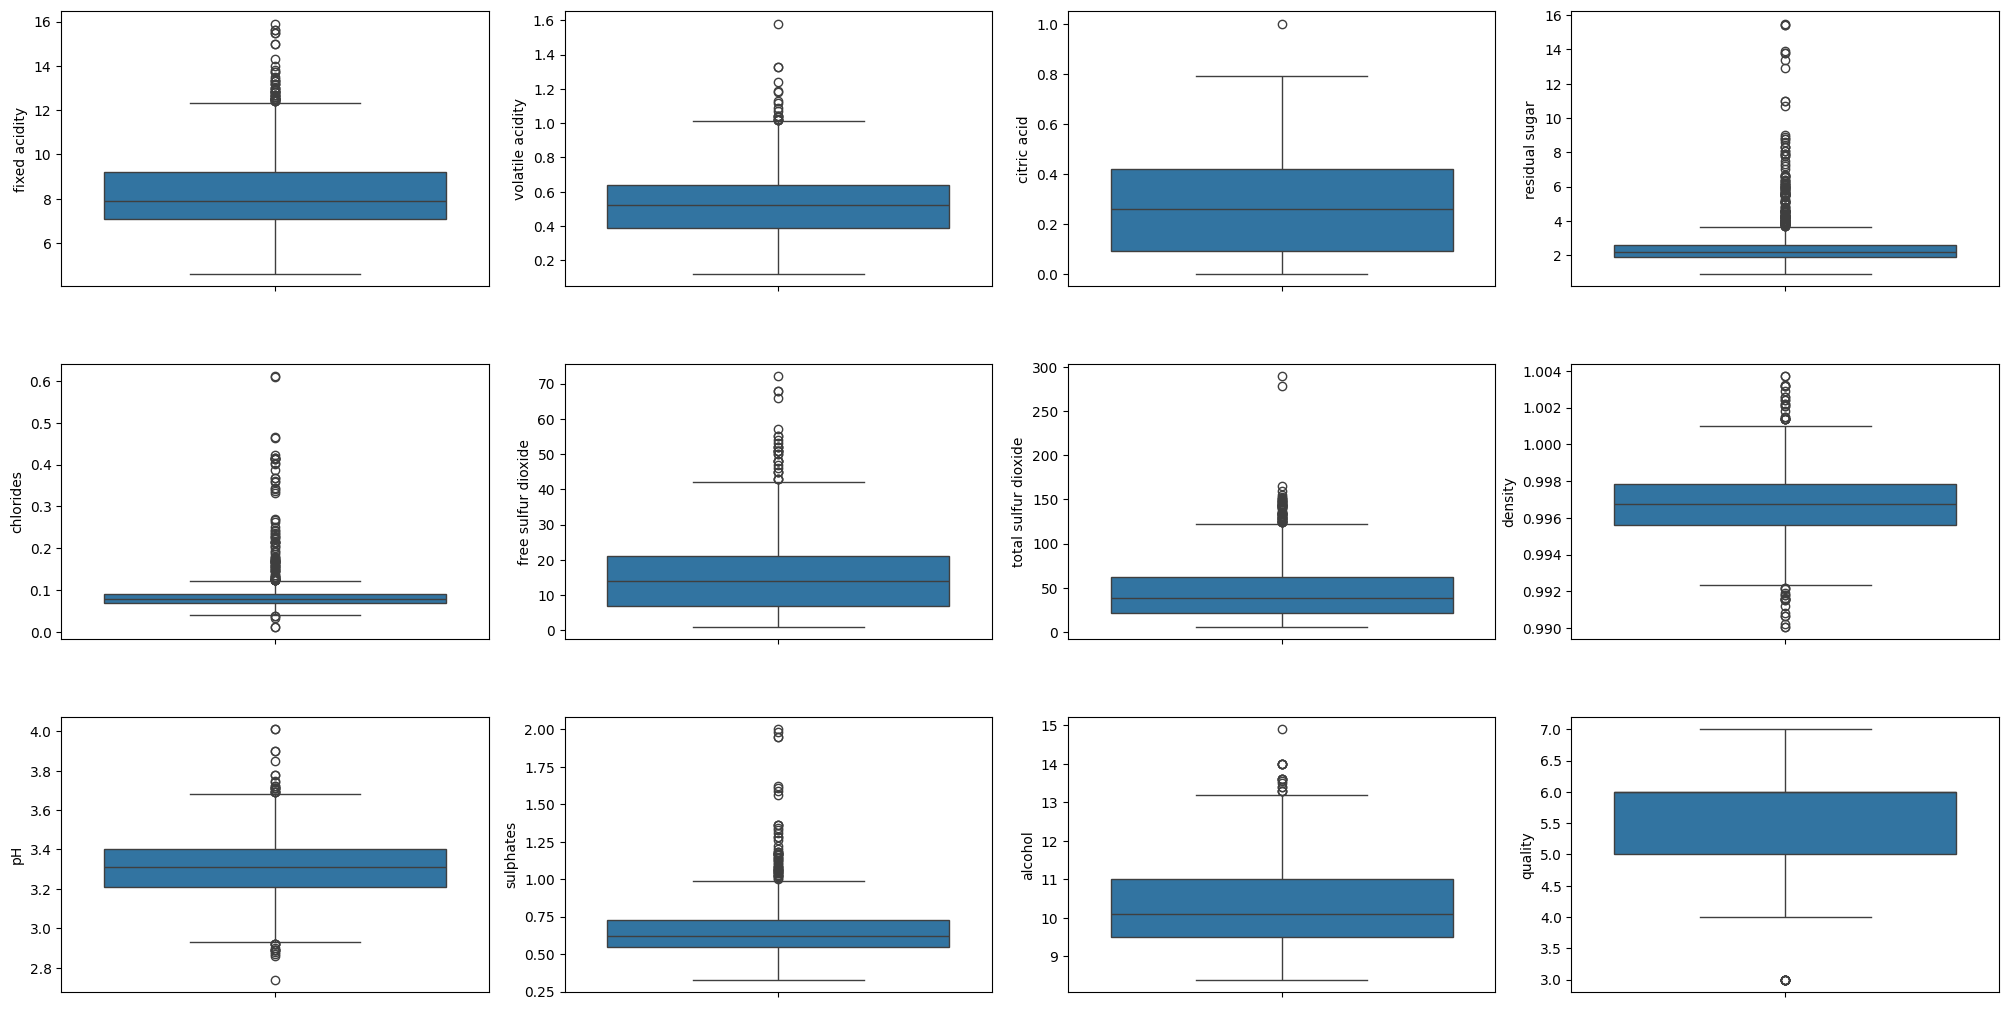

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

(array([ 10.,   0.,   0.,  53.,   0.,   0.,   0., 681.,   0.,   0.,   0.,
        638.,   0.,   0., 199.]),
 array([3.        , 3.26666667, 3.53333333, 3.8       , 4.06666667,
        4.33333333, 4.6       , 4.86666667, 5.13333333, 5.4       ,
        5.66666667, 5.93333333, 6.2       , 6.46666667, 6.73333333,
        7.        ]),
 <BarContainer object of 15 artists>)

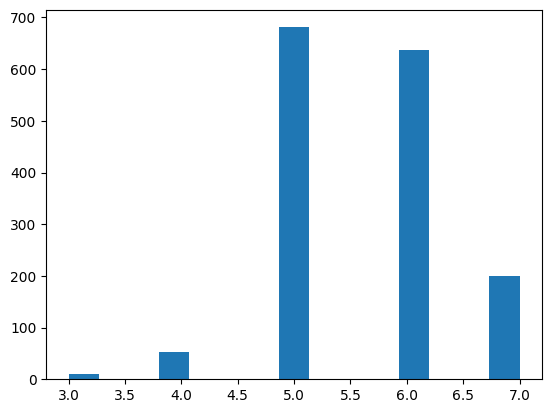

In [21]:
plt.hist(df['quality'], bins=15)

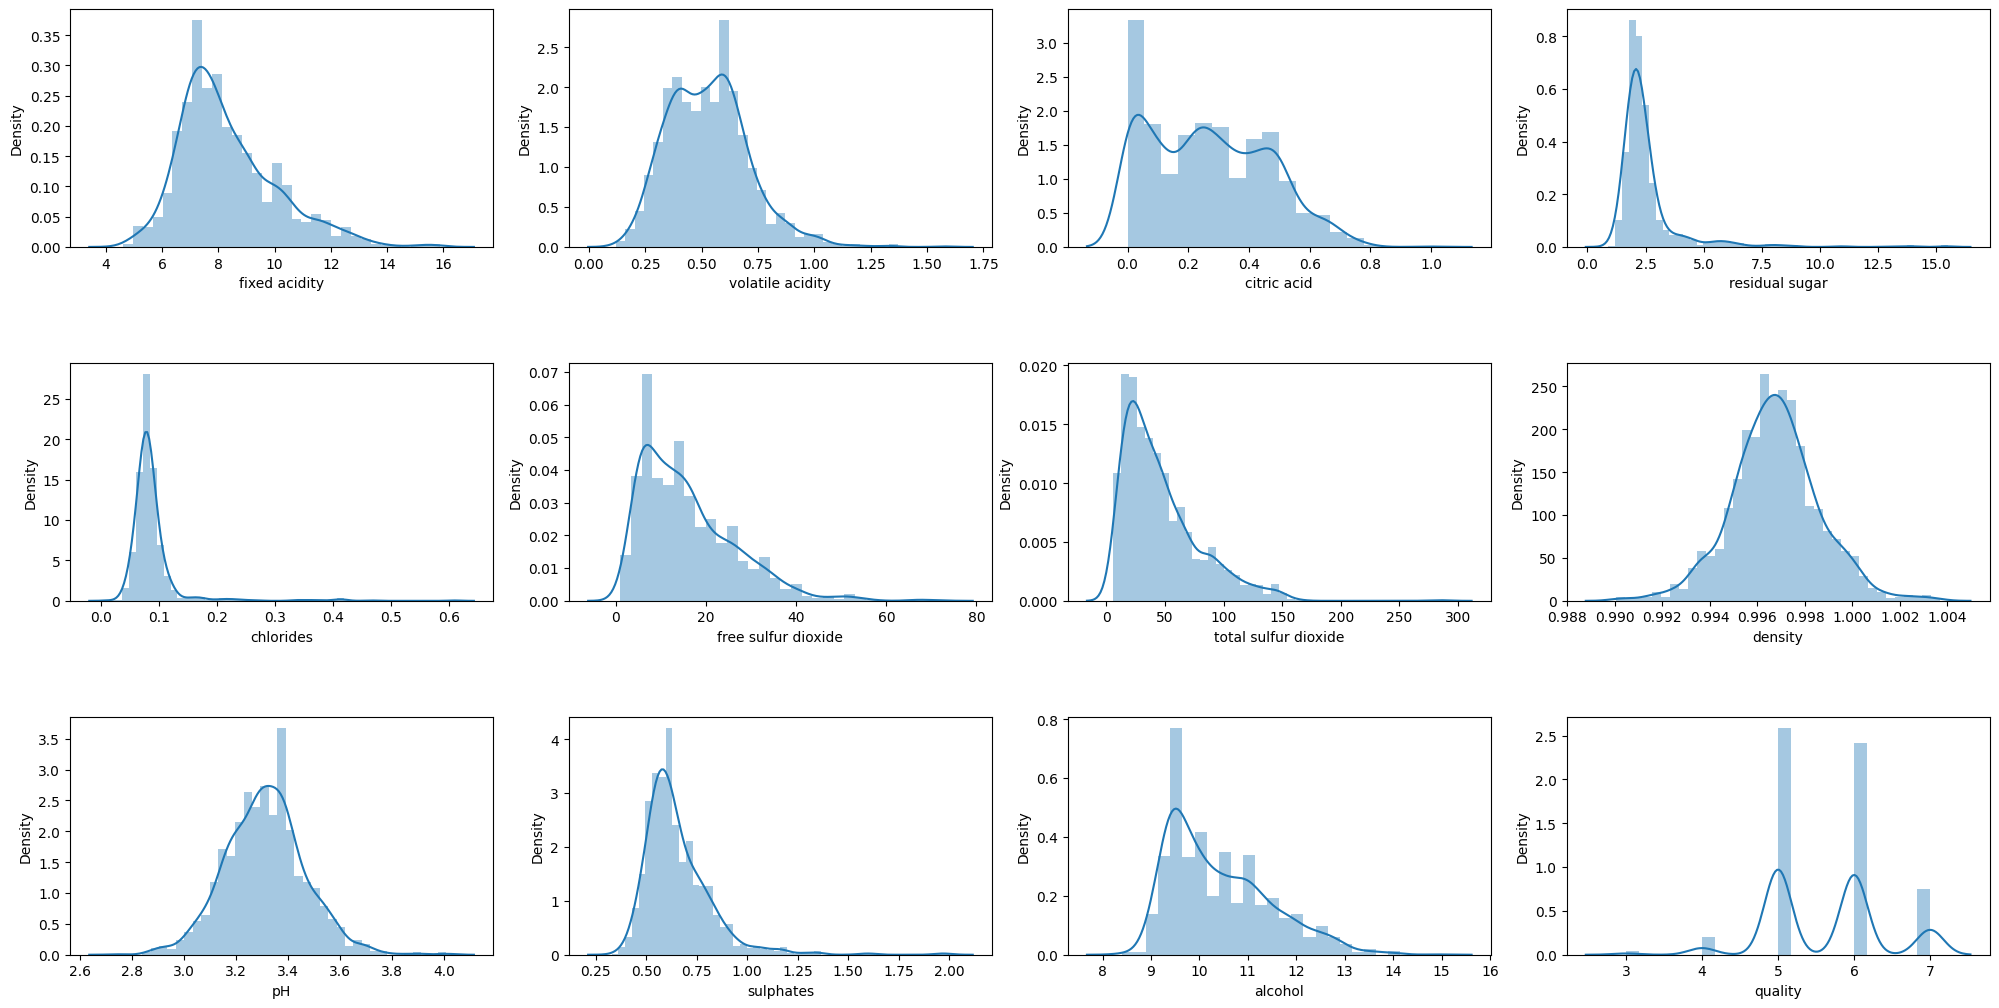

In [23]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.distplot(v, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

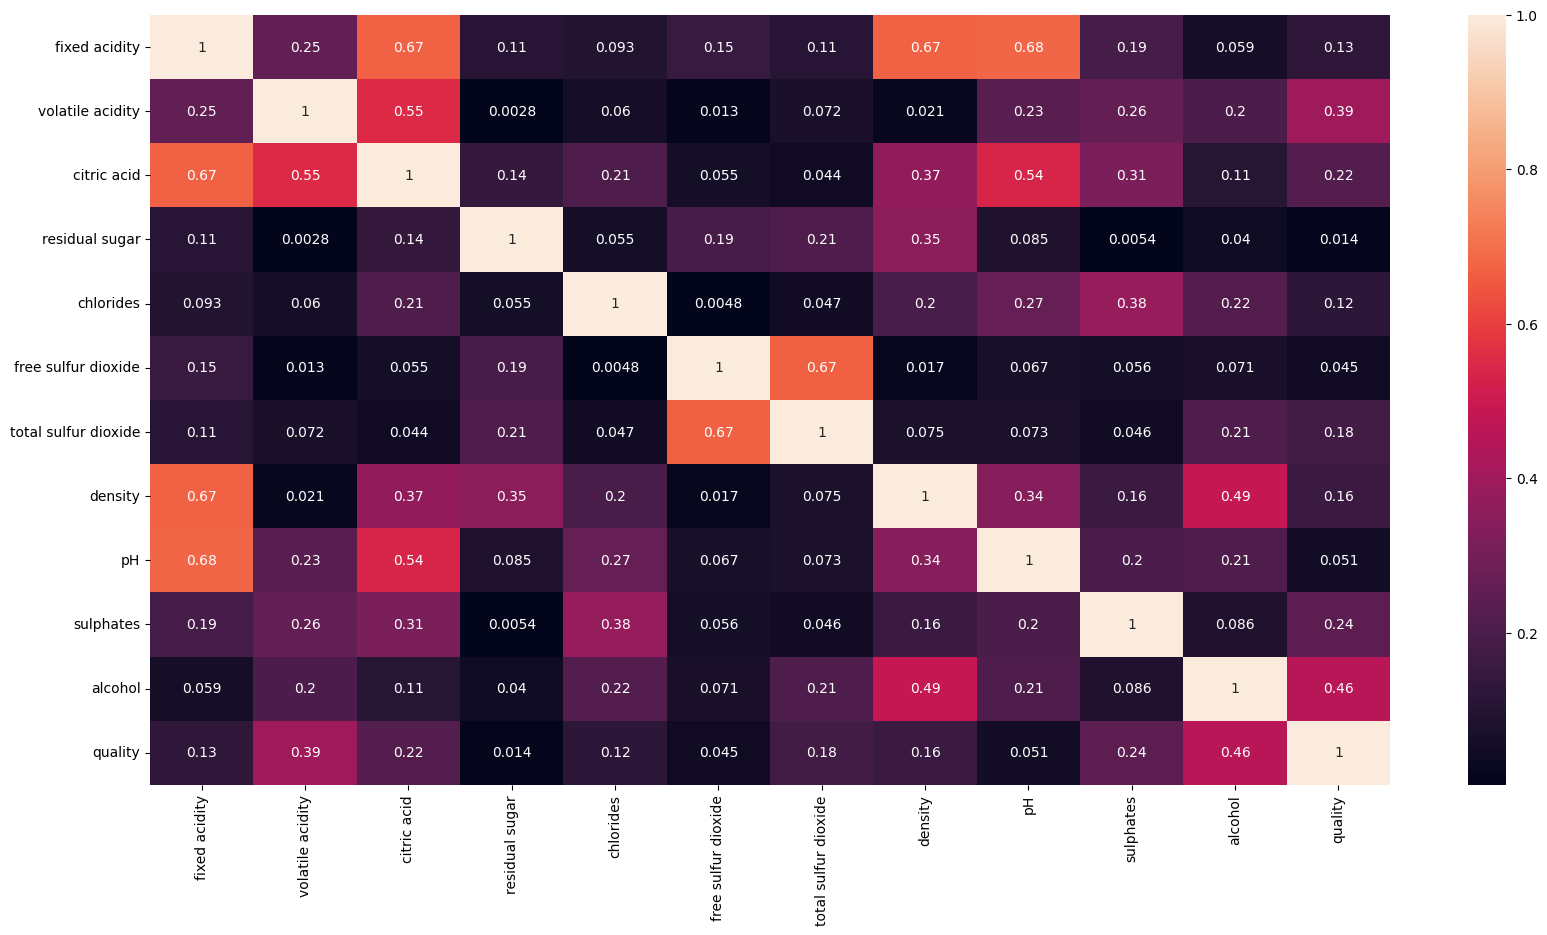

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

###preprocessing

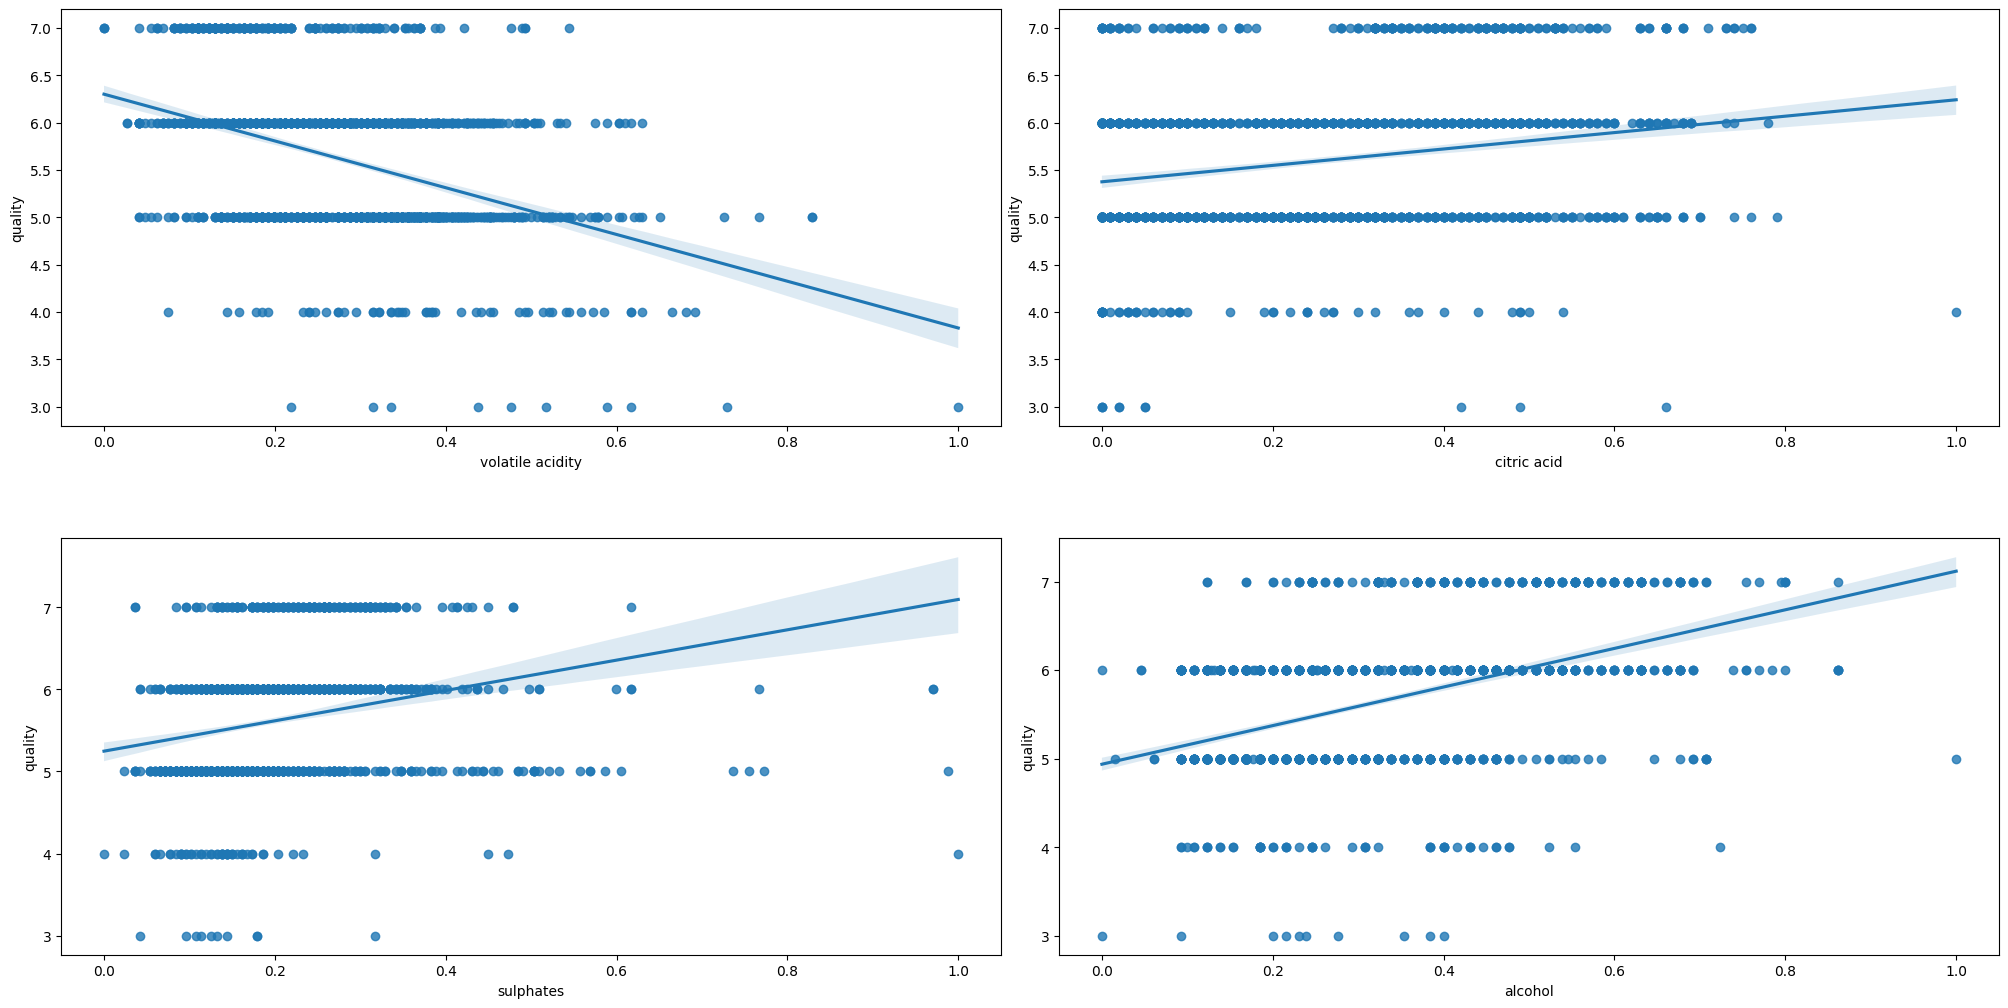

In [29]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
wanted_columns = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']
x = df.loc[:,wanted_columns]
y = df['quality']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=wanted_columns)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axs = axs.flatten()
for i, k in enumerate(wanted_columns):
  sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [30]:
y = np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew()) > 0.3:
    x[col] = np.log1p(x[col])

###chalange:

The "quality" attribute seems to be more useful for classification because its values are discrete and I feel that I should not have used it in "regplot" preprocessing.


###final word:

I searched for a medical dataset, but because I did not find a suitable dataset, I chose the "red juice dataset" dataset.

Thanks to reza shokrzad

Author: Donsalehi